In [1]:
import pandas as pd
import os

## (No Need to Run) Enrich the metadata with the filepaths of the audio to make it work with our AudioDataset Class

In [2]:
df = pd.read_csv('/users/vsharm44/projects/ssl-bioacoustics/data/voice_of_birds/metadata_train_processed.csv')

In [3]:
df.head()

,label,sample,common_name,scientific_name,recordist_name,recording_length,Date,TYPE,xc_id,Time,Country,Download_link
0,0,Common Ostrich_sound/Common Ostrich2.mp3,Common Ostrich,Struthio camelus australis,Frank Lambert,0:53,2019-10-30,call,XC516153,08:05,South Africa,https://xeno-canto.org/516153/download
1,0,Common Ostrich_sound/Common Ostrich3.mp3,Common Ostrich,Struthio camelus,Jeremy Hegge,0:26,2014-11-20,call,XC208209,04:00,South Africa,https://xeno-canto.org/208209/download
2,0,Common Ostrich_sound/Common Ostrich4.mp3,Common Ostrich,Struthio camelus,Jeremy Hegge,0:04,2014-11-21,call,XC208128,06:00,South Africa,https://xeno-canto.org/208128/download
3,0,Common Ostrich_sound/Common Ostrich5.mp3,Common Ostrich,Struthio camelus,Derek Solomon,0:11,2010-02-09,call,XC46725,07:00,South Africa,https://xeno-canto.org/46725/download
4,0,Common Ostrich_sound/Common Ostrich6.mp3,Common Ostrich,Struthio camelus,Morioka Zoological Park ZOOMO,1:47,2021-09-06,"voice during egg laying, zoo collection",XC675445,17:00,Japan,https://xeno-canto.org/675445/download


In [4]:
root_path = '/users/vsharm44/projects/ssl-bioacoustics/data/voice_of_birds/train'

In [5]:
# set the sample path by using os and walking the directory for a species
species_file = {}
for species in df['common_name'].unique():
    species_folder = species.replace("'", "") + '_sound'
    species_path = os.path.join(root_path, species_folder)
    files = os.listdir(species_path)
    if len(files) == 0:
        print(f"Species {species} has no files")
    files.sort(key=lambda x: int(x.split('.')[0][len(species.replace("'", "")):]))
    species_file[species] = files


In [6]:
species_file["Berlepsch's Tinamou"], species_file["Common Ostrich"]

(['Berlepschs Tinamou2.mp3',
  'Berlepschs Tinamou3.mp3',
  'Berlepschs Tinamou4.mp3',
  'Berlepschs Tinamou5.mp3',
  'Berlepschs Tinamou6.mp3',
  'Berlepschs Tinamou7.mp3',
  'Berlepschs Tinamou8.mp3',
  'Berlepschs Tinamou9.mp3',
  'Berlepschs Tinamou10.mp3',
  'Berlepschs Tinamou11.mp3',
  'Berlepschs Tinamou12.mp3',
  'Berlepschs Tinamou13.mp3',
  'Berlepschs Tinamou14.mp3'],
 ['Common Ostrich2.mp3',
  'Common Ostrich3.mp3',
  'Common Ostrich4.mp3',
  'Common Ostrich5.mp3',
  'Common Ostrich6.mp3',
  'Common Ostrich7.mp3',
  'Common Ostrich8.mp3'])

In [7]:
for index, data in df.iterrows():
    species = data['common_name']
    species_folder = species.replace("'", "") + '_sound'
    df.at[index, 'sample'] = os.path.join(species_folder, species_file[species].pop(0))


In [8]:
df.head()

,label,sample,common_name,scientific_name,recordist_name,recording_length,Date,TYPE,xc_id,Time,Country,Download_link
0,0,Common Ostrich_sound/Common Ostrich2.mp3,Common Ostrich,Struthio camelus australis,Frank Lambert,0:53,2019-10-30,call,XC516153,08:05,South Africa,https://xeno-canto.org/516153/download
1,0,Common Ostrich_sound/Common Ostrich3.mp3,Common Ostrich,Struthio camelus,Jeremy Hegge,0:26,2014-11-20,call,XC208209,04:00,South Africa,https://xeno-canto.org/208209/download
2,0,Common Ostrich_sound/Common Ostrich4.mp3,Common Ostrich,Struthio camelus,Jeremy Hegge,0:04,2014-11-21,call,XC208128,06:00,South Africa,https://xeno-canto.org/208128/download
3,0,Common Ostrich_sound/Common Ostrich5.mp3,Common Ostrich,Struthio camelus,Derek Solomon,0:11,2010-02-09,call,XC46725,07:00,South Africa,https://xeno-canto.org/46725/download
4,0,Common Ostrich_sound/Common Ostrich6.mp3,Common Ostrich,Struthio camelus,Morioka Zoological Park ZOOMO,1:47,2021-09-06,"voice during egg laying, zoo collection",XC675445,17:00,Japan,https://xeno-canto.org/675445/download


In [9]:
df[df['sample'].isna()]['common_name'].unique()

array([], dtype=object)

In [10]:
# check if all the paths exist
df['sample'].apply(lambda x: os.path.exists(os.path.join(root_path, x))).all()

np.True_

In [21]:
# save the cleaned metadata
# df.to_csv('/users/vsharm44/projects/ssl-bioacoustics/data/voice_of_birds/metadata_train_cleaned.csv', index=False)

## Dataset subset selection:
EDA on the data to select a good subset:

* Goal: We want a variety of noise and similar noise distribution per class/species common name.
    * Detail: Make the noise distribution within class exponential-like and similar across the classes.
* Goal: We want a balanced dataset.
    * Detail: The class counts across species should be similar.
    * Method: 
        * A: Variety of recordings: We only select species with >= 14 recordings. This leads to a total of 70 species out of the original 114 species.
        * B: Variety of samples within a recording: Filter for the length of the recordings. Some species have recordings > 1 hr of audio.
* Goal: Create the need to have a noise representation in the model.
    * Detail: The model is forced to learn the noise representation in low sample settings to be able to have good accuracy. In a big dataset, the variety in the data itself might help the model learn noise distribution, which makes the noise injection in our methods redundant.

The goal is to test the SSL methods so remove the dataset quality as a factor for the experiment.

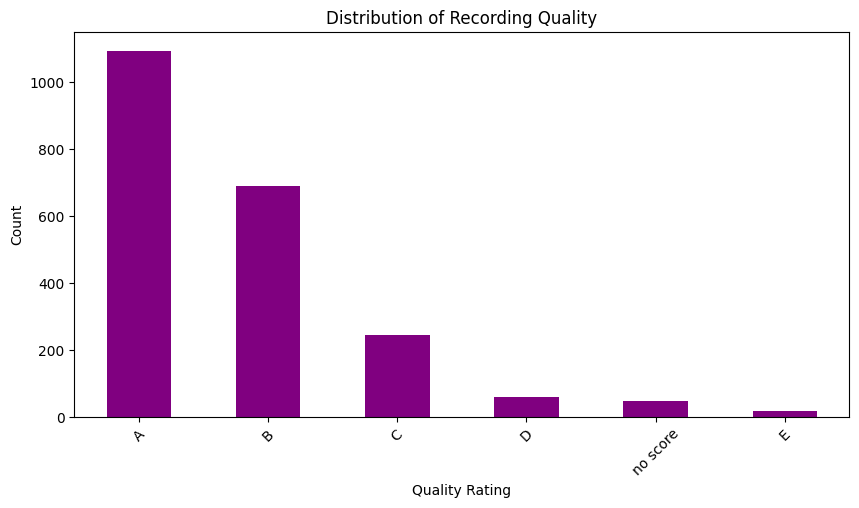

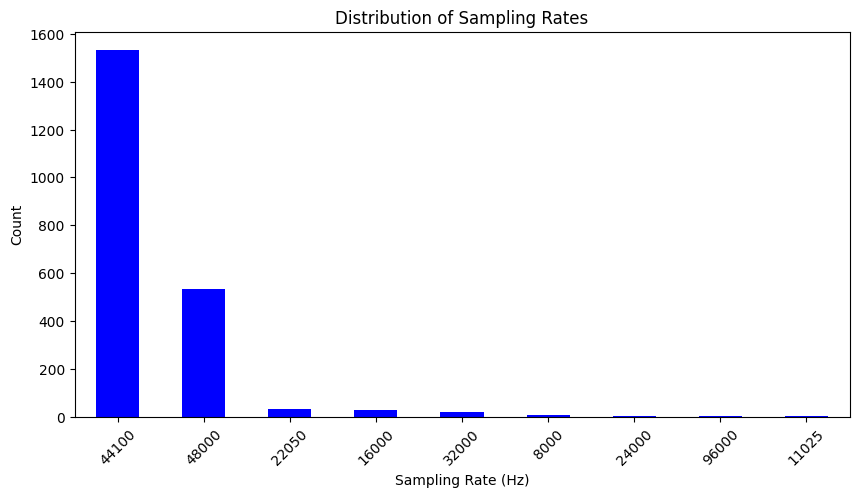

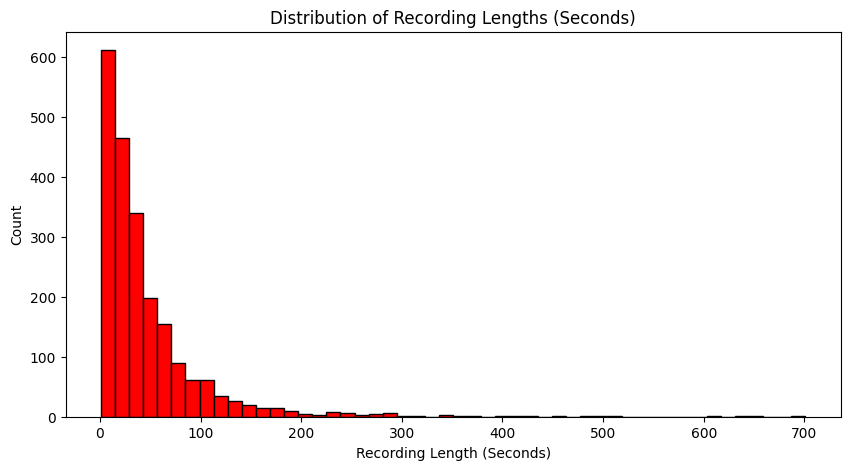

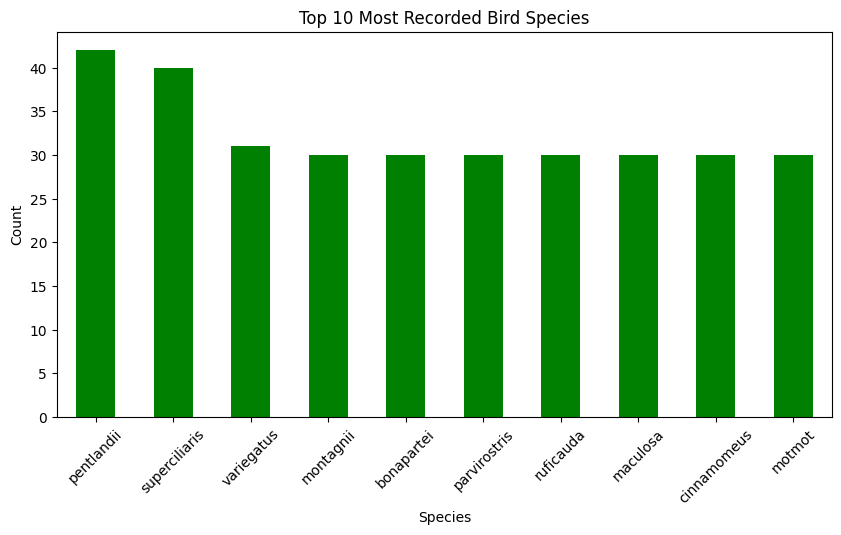

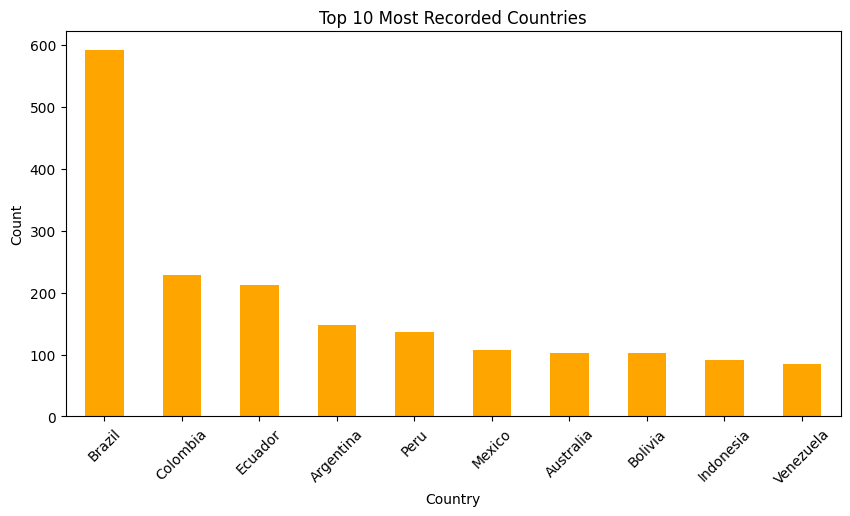

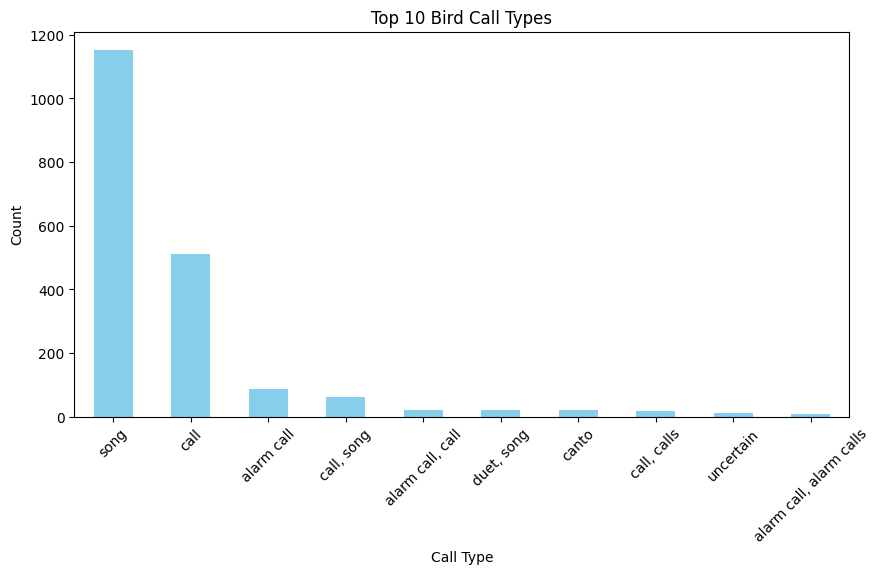

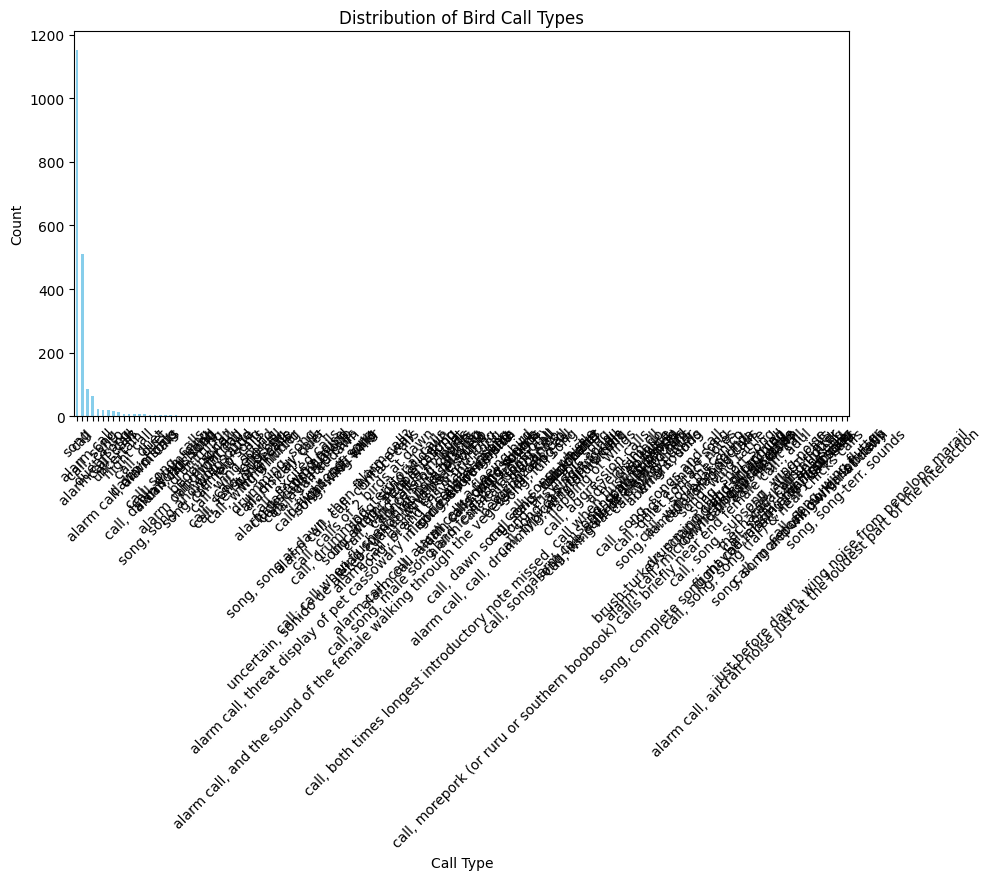

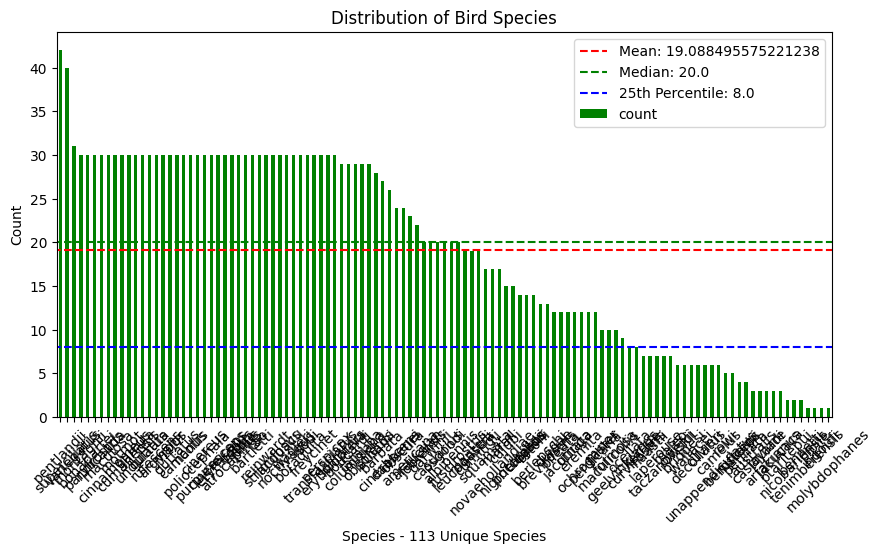

Dataset Summary: {'Total Records': 2157, 'Unique Bird Species': 113, 'Unique Locations': 1333, 'Unique Countries': 38, 'Most Common Call Type': 'song', 'Most Recorded Species': 'pentlandii', 'Most Recorded Country': 'Brazil'}
Recording Length Statistics: count    2157.000000
mean       46.800185
std        62.085542
min         1.000000
25%        13.000000
50%        29.000000
75%        57.000000
max       701.000000
Name: length_seconds, dtype: float64


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/users/vsharm44/projects/ssl-bioacoustics/configs/preprocessing_reproducibility_backup/voice_of_birds/cleaned_api_response.csv"
df = pd.read_csv(file_path, dtype=str)

# Convert length from MM:SS format to seconds
def convert_time_to_seconds(time_str):
    if isinstance(time_str, str) and ':' in time_str:
        try:
            minutes, seconds = map(int, time_str.split(':'))
            return minutes * 60 + seconds
        except ValueError:
            return np.nan
    return np.nan

df['length'] = df['length'].astype(str)
df['length_seconds'] = df['length'].apply(convert_time_to_seconds)

# General Dataset Summary
dataset_summary = {
    "Total Records": len(df),
    "Unique Bird Species": df['sp'].nunique(),
    "Unique Locations": df['loc'].nunique(),
    "Unique Countries": df['cnt'].nunique(),
    "Most Common Call Type": df['type'].mode()[0],
    "Most Recorded Species": df['sp'].mode()[0],
    "Most Recorded Country": df['cnt'].mode()[0],
}

# Recording Length Statistics
recording_length_stats = df['length_seconds'].describe()

# Plot 1: Recording Quality Distribution
plt.figure(figsize=(10, 5))
df['q'].value_counts().plot(kind='bar', color='purple')
plt.title("Distribution of Recording Quality")
plt.xlabel("Quality Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 2: Sampling Rate Distribution
plt.figure(figsize=(10, 5))
df['smp'].value_counts().plot(kind='bar', color='blue')
plt.title("Distribution of Sampling Rates")
plt.xlabel("Sampling Rate (Hz)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 3: Recording Length Histogram
plt.figure(figsize=(10, 5))
plt.hist(df['length_seconds'].dropna(), bins=50, color='red', edgecolor='black')
plt.title("Distribution of Recording Lengths (Seconds)")
plt.xlabel("Recording Length (Seconds)")
plt.ylabel("Count")
plt.show()

# Plot 4: Top 10 Most Recorded Bird Species
plt.figure(figsize=(10, 5))
df['sp'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 Most Recorded Bird Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 5: Top 10 Most Recorded Countries
plt.figure(figsize=(10, 5))
df['cnt'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Most Recorded Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 5.5: Top 10 Bird Call Type Distribution
plt.figure(figsize=(10, 5))
df['type'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Bird Call Types")
plt.xlabel("Call Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 6: Bird Call Type Distribution
plt.figure(figsize=(10, 5))
df['type'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Bird Call Types")
plt.xlabel("Call Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 7: Bird Species Distribution
plt.figure(figsize=(10, 5))
df['sp'].value_counts().plot(kind='bar', color='green')
plt.title("Distribution of Bird Species")
plt.xlabel(f"Species - {dataset_summary['Unique Bird Species']} Unique Species")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.hlines(df['sp'].value_counts().mean(), -1, len(df['sp'].value_counts()), colors='red', linestyles='dashed', label=f"Mean: {df['sp'].value_counts().mean()}")
plt.hlines(df['sp'].value_counts().median(), -1, len(df['sp'].value_counts()), colors='green', linestyles='dashed', label=f"Median: {df['sp'].value_counts().median()}")
plt.hlines(df['sp'].value_counts().quantile(0.25), -1, len(df['sp'].value_counts()), colors='blue', linestyles='dashed', label=f"25th Percentile: {df['sp'].value_counts().quantile(0.25)}")
plt.legend()
plt.show()

# Display results
print("Dataset Summary:", dataset_summary)
print("Recording Length Statistics:", recording_length_stats)


In [24]:
df['sp'].value_counts().describe()

count    113.000000
mean      19.088496
std       11.097424
min        1.000000
25%        8.000000
50%       20.000000
75%       30.000000
max       42.000000
Name: count, dtype: float64

## Manually pick the right threshold to drop species as per the number of recordings.

In [25]:
def test_dropping_threshold(threshold):
    species_counts = df['sp'].value_counts()
    species_to_drop = species_counts[species_counts <= threshold].index
    df_filtered = df[~df['sp'].isin(species_to_drop)]
    print("% change:", (len(df_filtered) - len(df)) / len(df) * 100, ", absolute change:", (len(df_filtered) - len(df)), "rows of data.")

    # Plot Bird Species Distribution
    plt.figure(figsize=(10, 5))
    df_filtered['sp'].value_counts().plot(kind='bar', color='green')
    plt.title("Distribution of Bird Species")
    plt.xlabel(f"Species - {df_filtered['sp'].nunique()} Unique Species")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    mean = df_filtered['sp'].value_counts().mean()
    median = df_filtered['sp'].value_counts().median()
    quantile_25 = df_filtered['sp'].value_counts().quantile(0.25)
    min_value = df_filtered['sp'].value_counts().min()
    plt.hlines(mean, -1, len(df['sp'].value_counts()), colors='red', linestyles='dashed', label=f"Mean: {mean}")
    plt.hlines(median, -1, len(df['sp'].value_counts()), colors='green', linestyles='dashed', label=f"Median: {median}")
    plt.hlines(quantile_25, -1, len(df['sp'].value_counts()), colors='blue', linestyles='dashed', label=f"25th Percentile: {quantile_25}")
    plt.hlines(min_value, -1, len(df['sp'].value_counts()), colors='aqua', linestyles='dashed', label=f"Min: {min_value}")
    plt.legend()
    plt.show()
    
    # Plot the distribution of the number of recordings per species
    plt.figure(figsize=(10, 5))
    plt.hist(df_filtered['sp'].value_counts(), bins=20, color='green', edgecolor='black')
    plt.title("Histogram of Number of Recordings per Species")
    plt.xlabel("Number of Recordings")
    plt.ylabel("Frequency")
    bin_edges = np.histogram_bin_edges(df_filtered['sp'].value_counts(), bins=20)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    counts, _ = np.histogram(df_filtered['sp'].value_counts(), bins=20)
    for count, x in zip(counts, bin_centers):
        plt.annotate(str(count), xy=(x, count), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
    plt.show()
    
    return len(df), len(df_filtered), df_filtered['sp'].nunique()

% change: -8.113120074177099 , absolute change: -175 rows of data.


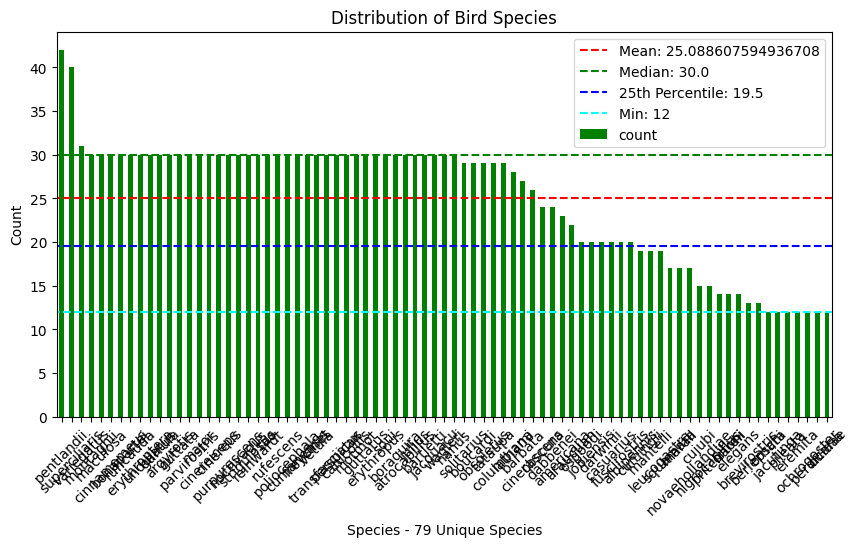

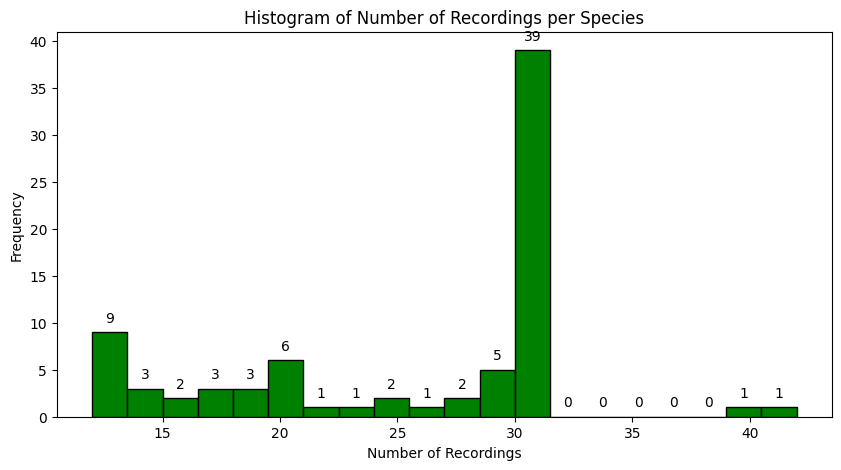

(2157, 1982, 79)

In [26]:
test_dropping_threshold(10)

% change: -12.007417709782105 , absolute change: -259 rows of data.


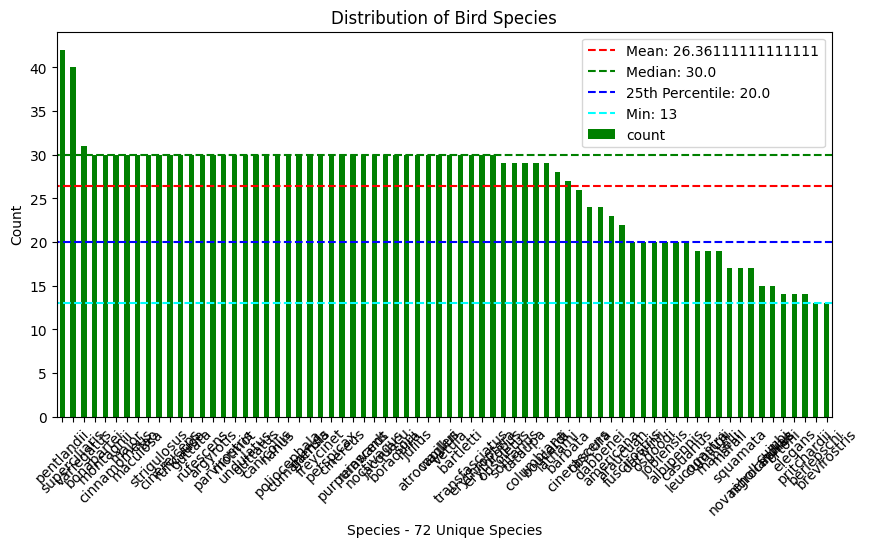

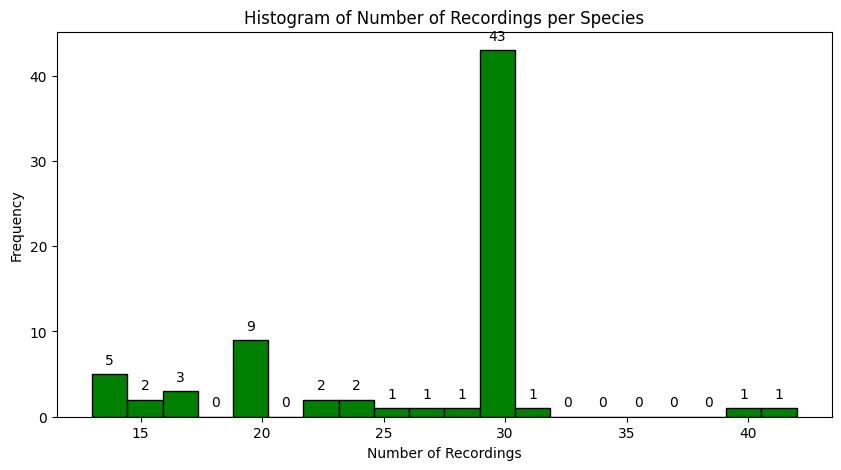

(2157, 1898, 72)

In [27]:
test_dropping_threshold(12)

% change: -13.212795549374132 , absolute change: -285 rows of data.


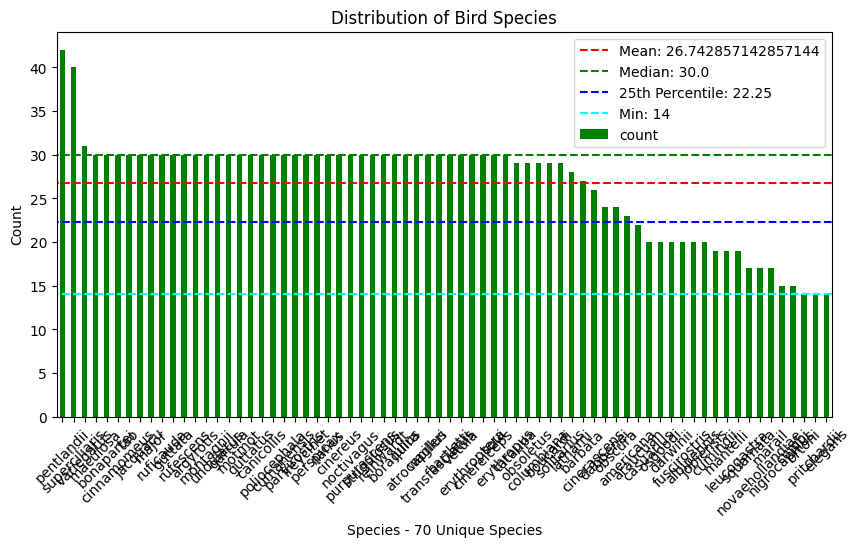

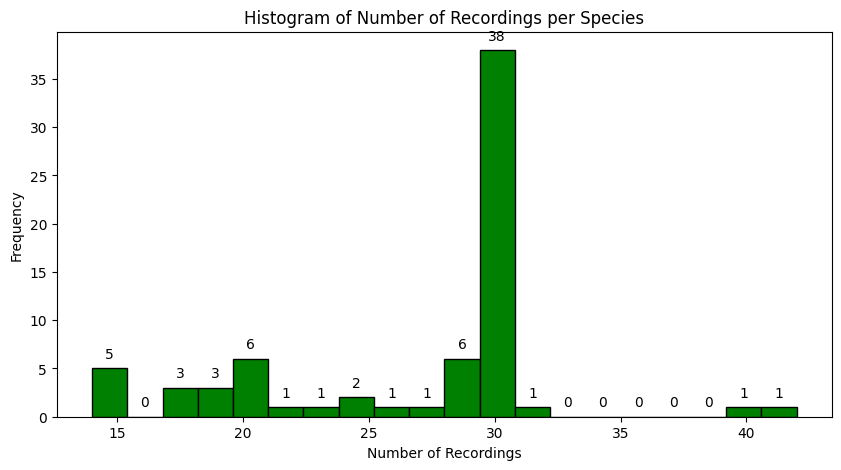

(2157, 1872, 70)

In [29]:
# stop at 70 species, 'good enough'
test_dropping_threshold(13)

## Picked the species with 14 or more number of recordings

In [30]:
species_counts = df['sp'].value_counts()
species_to_drop = species_counts[species_counts <= 13].index
df_filtered = df[~df['sp'].isin(species_to_drop)]
print("% change:", (len(df_filtered) - len(df)) / len(df) * 100, ", absolute change:", (len(df_filtered) - len(df)), "rows of data.")

% change: -13.212795549374132 , absolute change: -285 rows of data.


### comparison of old and filtered

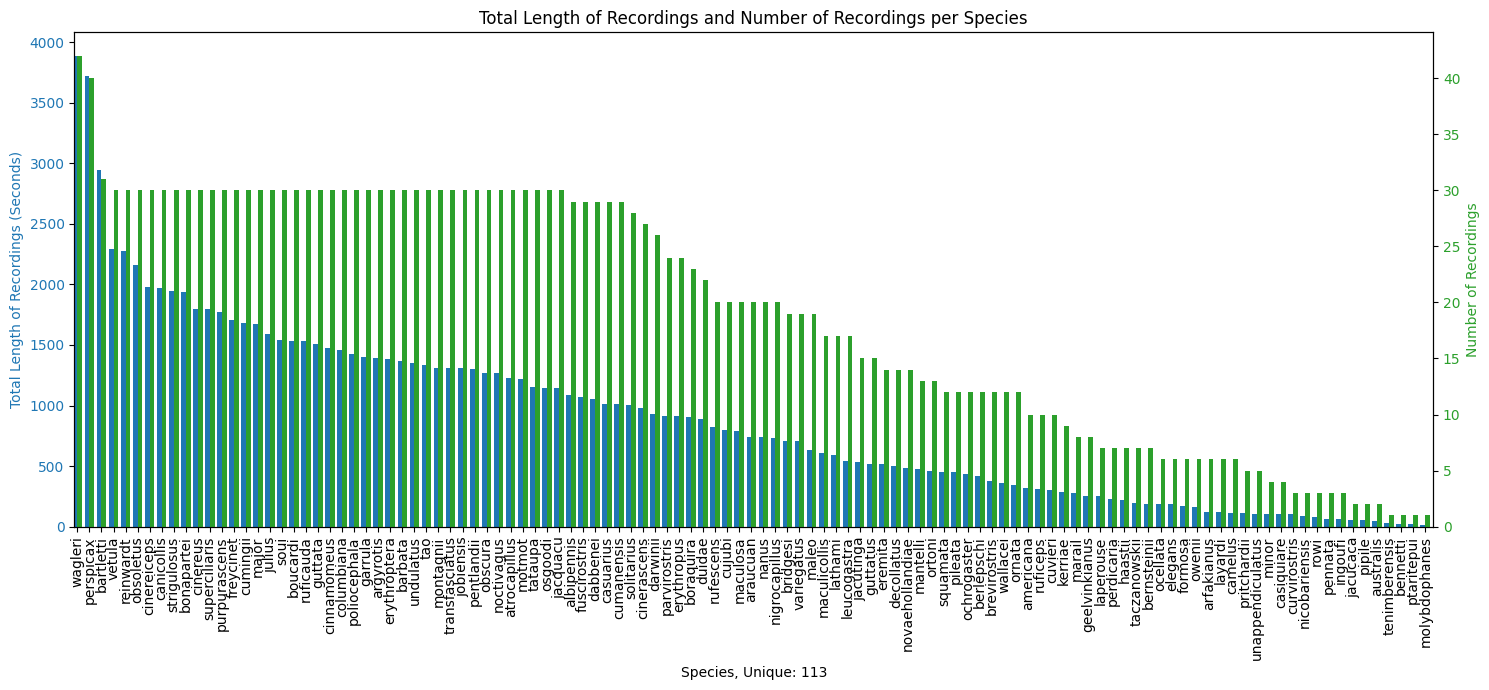

In [31]:
import matplotlib.pyplot as plt

# Group by species and sum the length of recordings
species_length = df.groupby('sp')['length_seconds'].sum().sort_values(ascending=False)

# Group by species and count the number of recordings
species_counts = df['sp'].value_counts().sort_values(ascending=False)

# Overlay the total length of recordings and number of recordings per species
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot the total length of recordings per species
color = 'tab:blue'
ax1.set_ylabel('Total Length of Recordings (Seconds)', color=color)
species_length.plot(kind='bar', color=color, ax=ax1, position=1, width=0.4)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot the number of recordings per species
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Number of Recordings', color=color)
species_counts.plot(kind='bar', color=color, ax=ax2, position=0, width=0.4)
ax2.tick_params(axis='y', labelcolor=color)

# Set the x-axis label and x-tick labels
ax1.set_xlabel('Species, Unique: {}'.format(len(species_length)))
ax1.set_xticklabels(species_length.index, rotation=90)

plt.title("Total Length of Recordings and Number of Recordings per Species")
fig.tight_layout()
plt.show()

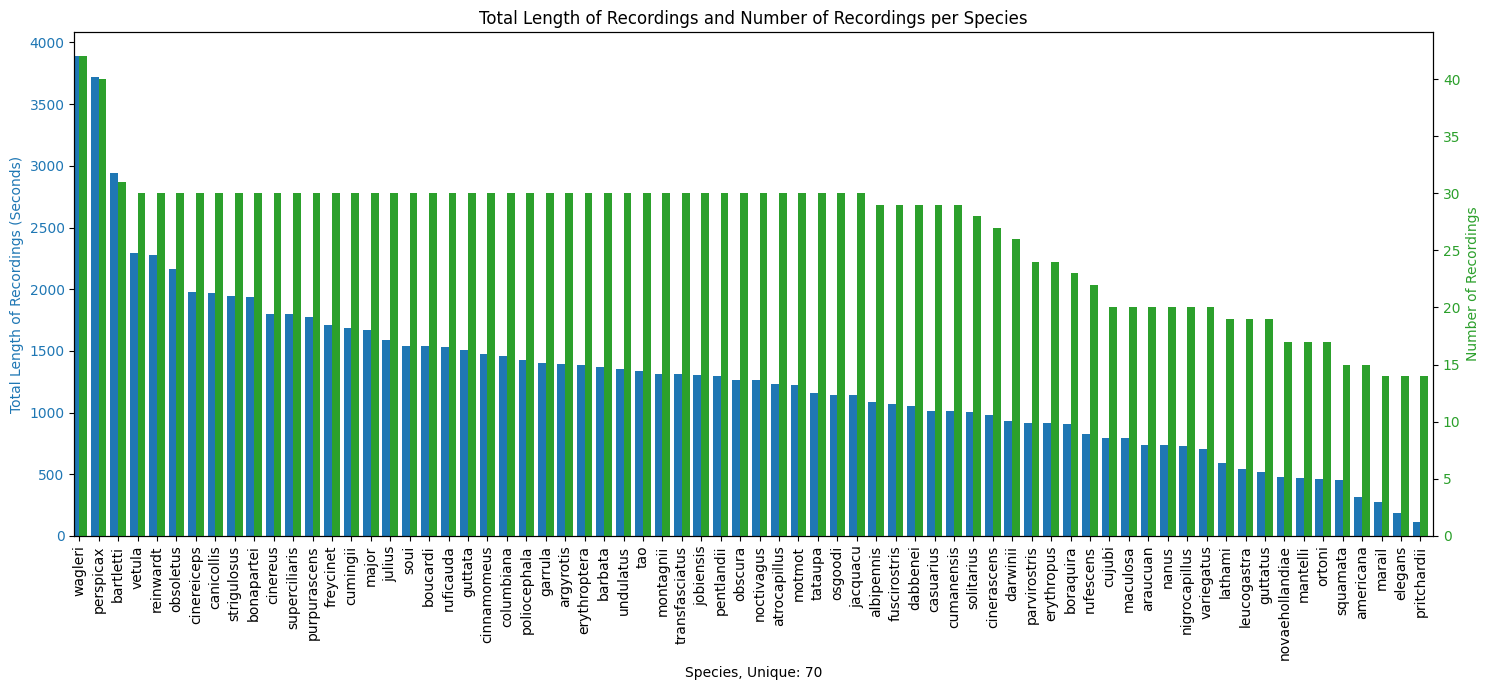

In [32]:
import matplotlib.pyplot as plt

# Group by species and sum the length of recordings
species_length = df_filtered.groupby('sp')['length_seconds'].sum().sort_values(ascending=False)

# Group by species and count the number of recordings
species_counts = df_filtered['sp'].value_counts().sort_values(ascending=False)

# Overlay the total length of recordings and number of recordings per species
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot the total length of recordings per species
color = 'tab:blue'
ax1.set_ylabel('Total Length of Recordings (Seconds)', color=color)
species_length.plot(kind='bar', color=color, ax=ax1, position=1, width=0.4)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot the number of recordings per species
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Number of Recordings', color=color)
species_counts.plot(kind='bar', color=color, ax=ax2, position=0, width=0.4)
ax2.tick_params(axis='y', labelcolor=color)

# Set the x-axis label and x-tick labels
ax1.set_xlabel('Species, Unique: {}'.format(len(species_length)))
ax1.set_xticklabels(species_length.index, rotation=90)

plt.title("Total Length of Recordings and Number of Recordings per Species")
fig.tight_layout()
plt.show()

### Now within these 70 species, we'll create training samples by splitting the recordings into chunk. Make sure that the distribution of the chunks (real training sample) is well balanced.

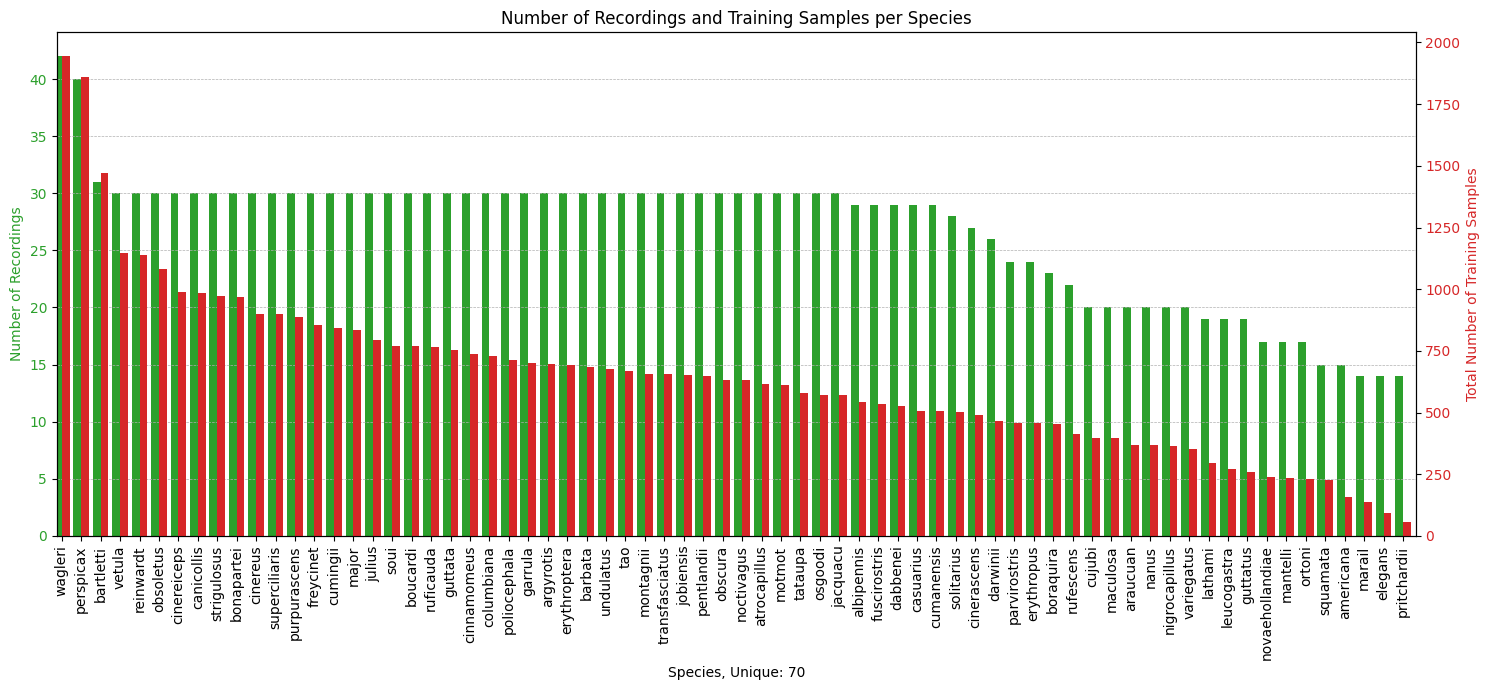

In [ ]:
import matplotlib.pyplot as plt

# Group by species and count the number of recordings
species_counts = df_filtered['sp'].value_counts().sort_values(ascending=False)

species_length = df_filtered.groupby('sp')['length_seconds'].sum().sort_values(ascending=False)

# Calculate the total number of training samples per species (species_length divided by the num of seconds per sample)
species_training_samples = species_length / 1

# Overlay the number of recordings and training samples per species
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot the number of recordings per species
color = 'tab:green'
ax1.set_ylabel('Number of Recordings', color=color)
species_counts.plot(kind='bar', color=color, ax=ax1, position=1, width=0.4)
ax1.tick_params(axis='y', labelcolor=color)

# Add grid with respect to the y-axis
ax1.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Create a second y-axis to plot the total number of training samples per species
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Number of Training Samples', color=color)
species_training_samples.plot(kind='bar', color=color, ax=ax2, position=0, width=0.4)
ax2.tick_params(axis='y', labelcolor=color)

# Set the x-axis label and x-tick labels
ax1.set_xlabel('Species, Unique: {}'.format(len(species_length)))
ax1.set_xticklabels(species_length.index, rotation=90)

plt.title("Number of Recordings and Training Samples per Species")
fig.tight_layout()
plt.show()


In [99]:
species_length

sp
wagleri        3888
perspicax      3724
bartletti      2944
vetula         2295
reinwardt      2274
               ... 
squamata        450
americana       317
marail          278
elegans         185
pritchardii     113
Name: length_seconds, Length: 70, dtype: int64

In [98]:
species_training_samples

sp
wagleri        1944.0
perspicax      1862.0
bartletti      1472.0
vetula         1147.5
reinwardt      1137.0
                ...  
squamata        225.0
americana       158.5
marail          139.0
elegans          92.5
pritchardii      56.5
Name: length_seconds, Length: 70, dtype: float64